## Part1

In [34]:
import numpy as np # linear algebra
import pandas as pd # pd.read_csv
import os
for dirname, _, filenames in os.walk("./kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [35]:
# read train data
train = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/train.csv")

# read test dataE:
test = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/test.csv")

# Have a first look at train data
print("Train shape:", train.shape)

# Have a first look at test data
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [36]:
# Have a look at first 5 data observations
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Have a look at last 5 data observations
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
# Have a look for possible missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [40]:
# Have a look at train and test columns
print("Train columns:", train.columns.tolist())
print("test columns:", test.columns.tolist())

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [41]:
# read sample submission file
sample_submission = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/gender_submission.csv")

# Have at the first 5 observations of sample submission
print(sample_submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [42]:
# Look at last 5 observations
print(sample_submission.tail())

     PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0


In [43]:
# Load our plotting libraraies
import matplotlib.pyplot as plt
import seaborn as sns

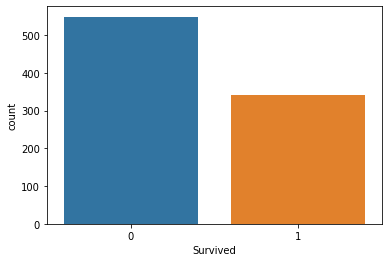

In [44]:
# Countplot for "Survived" variable
sns.countplot(train["Survived"])

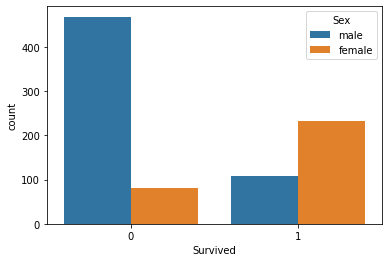

In [45]:
 sns.countplot(x = "Survived", hue = "Sex", data = train)

In [46]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to our train data, by converting "Sex" to 
# a dummy varible, to feed it into the model
logisticRegression = LogisticRegression()
logisticRegression.fit(X = pd.get_dummies(train["Sex"]), y = train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Predict!
test["Survived"] = logisticRegression.predict(pd.get_dummies(test["Sex"]))

#  write test prediction for final submission
test[["PassengerId", "Survived"]].to_csv("kaggle_submission.csv", index = False)

## Part 2

In [48]:
import numpy as np # linear algebra
import pandas as pd # pd.read_csv
import os
for dirname, _, filenames in os.walk("./kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [49]:
# Load our plotting libraraies
import matplotlib.pyplot as plt
import seaborn as sns

# Load our warning library,ignore warning
import warnings
warnings.filterwarnings("ignore")

In [50]:
# read train data
train = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/train.csv")

# read test data
test = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/test.csv")

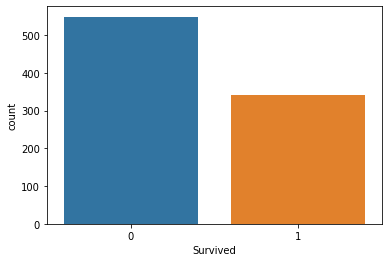

In [51]:
# Countplot for "Survived" variable
sns.countplot(train["Survived"])

In [52]:
round(np.mean(train["Survived"]), 2)

0.38

In [53]:
print(train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [54]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [55]:
train.isnull().mean().sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

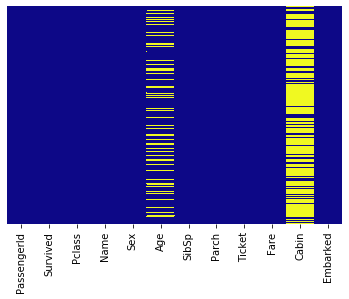

In [56]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "plasma")

In [57]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Mr. Benjamin",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


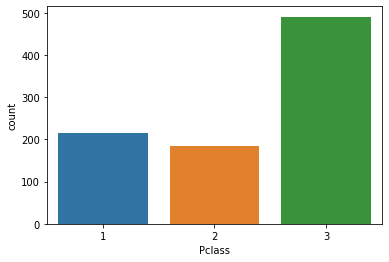

In [58]:
sns.countplot(train["Pclass"])

In [59]:
train.Name.value_counts()

Hart, Mr. Benjamin                 1
Sutton, Mr. Frederick              1
Bing, Mr. Lee                      1
Harris, Mr. Walter                 1
Gustafsson, Mr. Anders Vilhelm     1
                                  ..
Nilsson, Miss. Helmina Josefina    1
Icard, Miss. Amelie                1
Guggenheim, Mr. Benjamin           1
Kallio, Mr. Nikolai Erland         1
Osman, Mrs. Mara                   1
Name: Name, Length: 891, dtype: int64

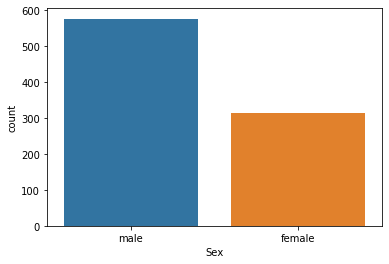

In [60]:
sns.countplot(train["Sex"])

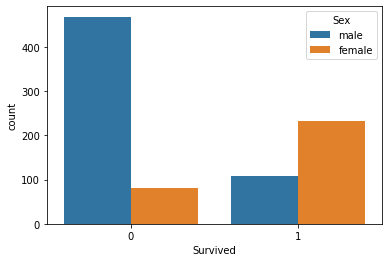

In [61]:
sns.countplot(x = "Survived", hue = "Sex", data = train)

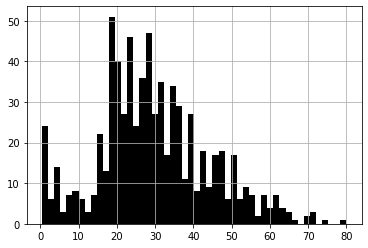

In [62]:
train["Age"].hist(bins = 50, color = "black")

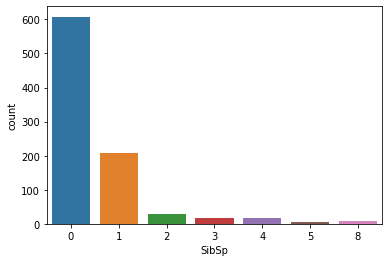

In [63]:
sns.countplot(train["SibSp"])

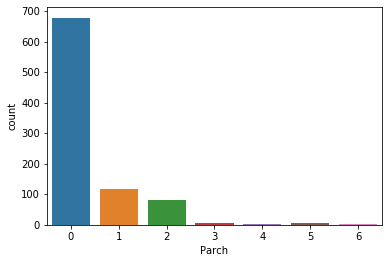

In [64]:
sns.countplot(train["Parch"])

In [65]:
train.Ticket.value_counts()

CA. 2343            7
1601                7
347082              7
347088              6
3101295             6
                   ..
27042               1
A/5. 2151           1
350034              1
A/4. 39886          1
STON/O2. 3101282    1
Name: Ticket, Length: 681, dtype: int64

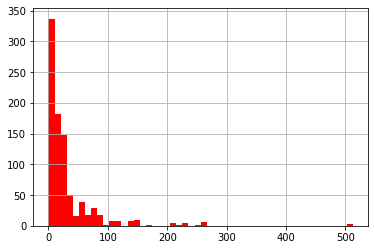

In [66]:
# Plot "Fare" histogram
train["Fare"].hist(bins = 50, color = "red")

In [67]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
              ..
C110           1
D21            1
B82 B84        1
D47            1
B78            1
Name: Cabin, Length: 147, dtype: int64

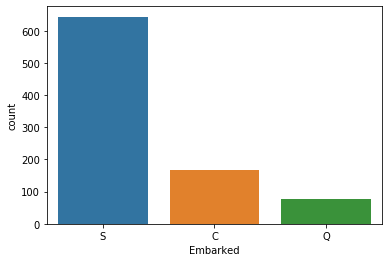

In [68]:
sns.countplot(train["Embarked"])

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


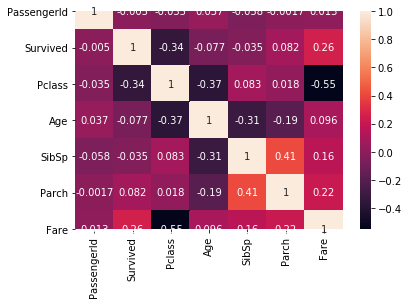

In [70]:
sns.heatmap(train.corr(), annot = True)

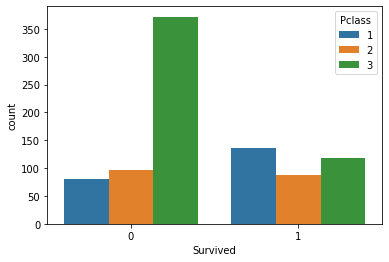

In [71]:
sns.countplot(x = "Survived", hue = "Pclass", data = train)

In [72]:
age_group = train.groupby("Pclass")["Age"]
print(age_group.median())

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [73]:
train.loc[train.Age.isnull(), "Age"] = train.groupby("Pclass").Age.transform("median")
print(train["Age"].isnull().sum())

0


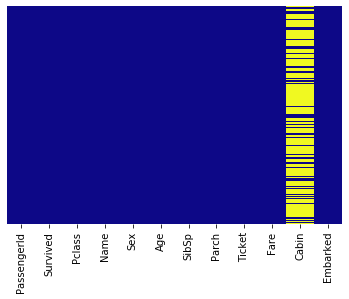

In [74]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "plasma")

In [75]:
train.drop("Cabin", axis = 1, inplace = True)

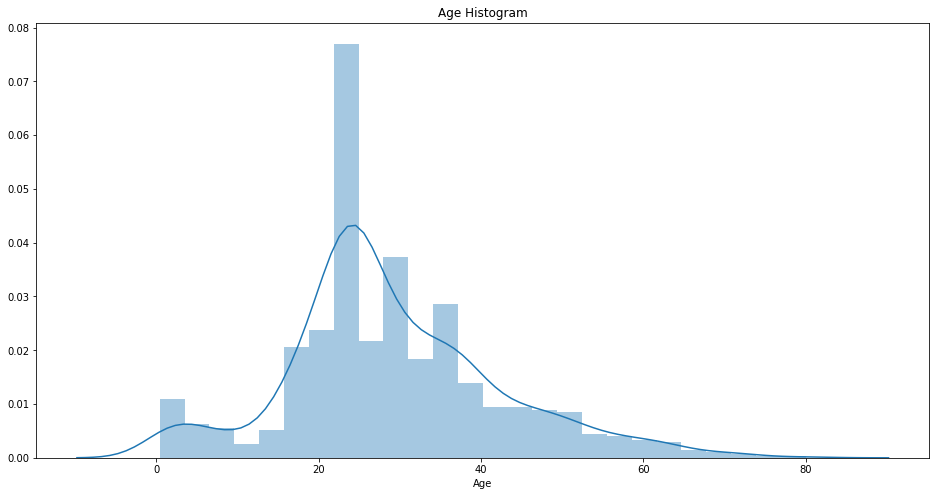

In [76]:
plt.figure(figsize = (16, 8))

sns.distplot(train["Age"])
plt.title("Age Histogram")
plt.xlabel("Age")
plt.show()

In [77]:
train.isnull().sum().sort_values(ascending = False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [78]:
from statistics import mode

# Let's impute "Embarked" missing values with the mode,which happens to be "S"!
train["Embarked"] = train["Embarked"].fillna(mode(train["Embarked"]))

In [79]:
# Convert "Sex" varible to integer form!
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# Convert "Embarked" varible to integer form!
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

In [80]:
train["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [81]:
train["Embarked"]

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: object

In [82]:
train.drop(["Name", "Ticket"], axis = 1, inplace = True)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
train.drop(["Survived", "PassengerId"],axis = 1),train["Survived"], test_size = 0.2, random_state = 2)

In [84]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
predictions = logisticRegression.predict(X_test)

In [86]:
print(predictions)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [87]:
round(np.mean(predictions), 2)

0.33

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))

[[91  9]
 [29 50]]


In [89]:
accuracy = (91 + 52) / (91+9+27+52)
print("accuracy is: " + str(round(accuracy, 2)))

accuracy is: 0.8


## part 3

In [90]:
import numpy as np # linear algebra
import pandas as pd # pd.read_csv
import os
for dirname, _, filenames in os.walk("./kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [91]:
# Load our plotting libraraies
import matplotlib.pyplot as plt
import seaborn as sns

# Load our warning library,ignore warning
import warnings
warnings.filterwarnings("ignore")

In [93]:
# read train data
train = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/train.csv")

# read test data
test = pd.read_csv("E:/jupyter_notebook/kaggle/input/titanic/test.csv")

In [94]:
# A trick to keep our "Survived" in our dataset
test["Survived"] = np.nan

# Train + test concatenation
full = pd.concat([train, test])

In [95]:
full.head()
full.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [96]:
train.isnull().mean().sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [97]:
from statistics import mode

# Let's impute "Embarked" missing values with the mode,which happens to be "S"!
full["Embarked"] = full["Embarked"].fillna(mode(full["Embarked"]))

In [98]:
# Convert "Sex" varible to integer form!
full["Sex"][full["Sex"] == "male"] = 0
full["Sex"][full["Sex"] == "female"] = 1

# Convert "Embarked" varible to integer form!
full["Embarked"][full["Embarked"] == "S"] = 0
full["Embarked"][full["Embarked"] == "C"] = 1
full["Embarked"][full["Embarked"] == "Q"] = 2

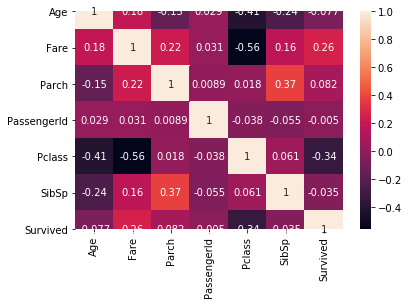

In [99]:
sns.heatmap(full.corr(), annot = True)

In [100]:
# Grouping "Age" by "Pclass" and using a lambda to impute the Age again
full["Age"] = full.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

In [101]:
# Grouping "Fare" by "Pclass" and using a lambda ti impute the Fare median
full["Fare"] = full.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))

In [102]:
# Replace missing values with "U" for cabin
full["Cabin"] = full["Cabin"].fillna("U")

In [103]:
full.isnull().mean().sort_values(ascending = False)

Survived       0.319328
Ticket         0.000000
SibSp          0.000000
Sex            0.000000
Pclass         0.000000
PassengerId    0.000000
Parch          0.000000
Name           0.000000
Fare           0.000000
Embarked       0.000000
Cabin          0.000000
Age            0.000000
dtype: float64

In [104]:
full["Cabin"].unique().tolist()

['U',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [105]:
import re

# Extract (first) letter!
full["Cabin"] = full["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

In [106]:
full["Cabin"].unique().tolist()

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [107]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}

# Mapping "Cabin" to group
full["Cabin"] = full["Cabin"].map(cabin_category)
full["Cabin"].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

In [108]:
full["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [109]:
# Extract the salutation!
full["Title"] = full.Name.str.extract("([A-Za-z]+)\.", expand = False)

In [110]:
full["Title"].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [111]:
# Look at salutations percentages
full["Title"].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Major        0.152788
Ms           0.152788
Mlle         0.152788
Lady         0.076394
Jonkheer     0.076394
Countess     0.076394
Dona         0.076394
Sir          0.076394
Mme          0.076394
Capt         0.076394
Don          0.076394
Name: Title, dtype: float64

In [112]:
full["Title"] = full["Title"].replace \
([ 'Don','Rev','Dr','Mme','Ms','Major','Lady','Sir','Mlle','Col','Capt','Countess','Jonkheer','Dona'],"other")

In [113]:
full["Title"].value_counts(normalize = True) * 100

Mr        57.830405
Miss      19.862490
Mrs       15.049656
Master     4.660046
other      2.597403
Name: Title, dtype: float64

In [114]:
title_category = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'other':5}

full["Title"] = full["Title"].map(title_category)
full["Title"].unique().tolist()

[1, 2, 3, 4, 5]

In [115]:
print(full.columns.tolist())

['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title']


In [116]:
full["familySize"] = full["SibSp"] + full["Parch"] + 1

In [117]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,familySize
0,22.0,9,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,1,2
1,38.0,3,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2,2
2,26.0,9,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,3,1
3,35.0,3,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2,2
4,35.0,9,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,1,1


In [118]:
full = full.drop(["Name", "SibSp", "Parch", "Ticket"], axis = 1)

In [119]:
full.head()

,Age,Cabin,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,familySize
0,22.0,9,0,7.2500,1,3,0,0.0,1,2
1,38.0,3,1,71.2833,2,1,1,1.0,2,2
2,26.0,9,0,7.9250,3,3,1,1.0,3,1
3,35.0,3,0,53.1000,4,1,1,1.0,2,2
4,35.0,9,0,8.0500,5,3,0,0.0,1,1


In [120]:
test = full[full["Survived"].isna()].drop(["Survived"], axis = 1)

In [121]:
test.head()

,Age,Cabin,Embarked,Fare,PassengerId,Pclass,Sex,Title,familySize
0,34.5,9,2,7.8292,892,3,0,1,1
1,47.0,9,0,7.0000,893,3,1,2,2
2,62.0,9,2,9.6875,894,2,0,1,1
3,27.0,9,0,8.6625,895,3,0,1,1
4,22.0,9,0,12.2875,896,3,1,2,3


In [122]:
# recover train dataset
train = full[full["Survived"].notna()]

In [123]:
train.head()

,Age,Cabin,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,familySize
0,22.0,9,0,7.2500,1,3,0,0.0,1,2
1,38.0,3,1,71.2833,2,1,1,1.0,2,2
2,26.0,9,0,7.9250,3,3,1,1.0,3,1
3,35.0,3,0,53.1000,4,1,1,1.0,2,2
4,35.0,9,0,8.0500,5,3,0,0.0,1,1


In [124]:
train["Survived"] = train["Survived"].astype(np.int8)

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
train.drop(["Survived", "PassengerId"],axis = 1),train["Survived"], test_size = 0.2, random_state = 2)

In [126]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
predictions = logisticRegression.predict(X_test)

In [128]:
print(predictions)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0
 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [129]:
round(np.mean(predictions), 2)

0.35

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[91  9]
 [26 53]]


In [131]:
num = cm[0][0] + cm[1][1] # numerator
den = sum(map(sum,cm)) # denominator

accuracy = num/den
print("accuracy is: " + str(round(accuracy, 2)))

accuracy is: 0.8


#### Cross-vaildation

In [132]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = 2)

In [133]:
from sklearn.model_selection import cross_val_score

cross_val_score(logisticRegression, train.drop(["Survived", "PassengerId"],
                axis = 1),train["Survived"], cv = kf).mean()

0.8024606113866047

#### Hyperparameter Tuning

In [134]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=2)

In [135]:
# Set our parameter grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100, 300, 500],
    'max_features' : ['auto', 'log2'],
    'max_depth' : [3, 5, 7]
}

In [136]:
from sklearn.model_selection import GridSearchCV

# Grid search
randomForest_CV = GridSearchCV(estimator = randomForest, param_grid = param_grid, cv=5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [137]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [138]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini',
                         max_depth = 7, max_features = 'auto', n_estimators = 300)

In [139]:
randomForestFinalModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [140]:
predictions = randomForestFinalModel.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
print("accuracy is: ", round(accuracy_score(y_test, predictions), 2))

accuracy is:  0.81


In [142]:
# predict
test["Survived"] = randomForestFinalModel.predict(test.drop(["PassengerId"], axis=1))

In [143]:
# write test predictions for final submission
test[["PassengerId", "Survived"]].to_csv("rf_submission.csv", index = False)